# Concat HSI and GT

In [1]:
#https://colab.research.google.com/drive/1Lstx55MxHT8bpXlgnaXYloVCmagE_xC7?usp=sharing#scrollTo=-T6nwPzcIone

#getting the data from 1 pixel in a single image
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt

hs_data1 = spectral.open_image('Datasets/WATER_HSI/REFLECTANCE_2021-09-12_039.hdr')

hs_data2 = spectral.open_image('Datasets/WATER_HSI/REFLECTANCE_2021-09-12_003.hdr')

gt1 = Image.open('Datasets/WATER_HSI/LabeledImg/label35.png')
gt2 = Image.open('Datasets/WATER_HSI/LabeledImg/label2.png')

In [2]:
arr1 = np.array(hs_data1.load())
arr2 = np.array(hs_data2.load())


In [4]:
arr1.shape

(512, 512, 204)

In [5]:
arr_mix = np.concatenate((arr1, arr2), axis = 1)

arr_mix.shape

(512, 1024, 204)

In [7]:
gt1_array = np.asarray(gt1)
gt2_array = np.asarray(gt2)

gt_mix = np.concatenate((gt1_array, gt2_array), axis = 1)
gt_mix.shape

(512, 1024, 3)

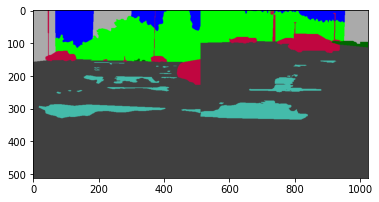

In [10]:
import matplotlib.pyplot as plt

plt.imshow(gt_mix)

# Scaleable

## HSI

In [1]:
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt
import os

hsi_folder = 'Datasets/WATER_HSI/'
hsi_hdr_file = 'Datasets/WATER_HSI/*.hdr'
arr_mix = 0
i = 0
for file in os.listdir(hsi_folder):
    if file.endswith('.hdr'):
        print(file)
        full_hsi_path = os.path.join(hsi_folder, file)
        hs_data = spectral.open_image(full_hsi_path)
        arr = np.array(hs_data.load())
        if i == 0:
            arr_mix = arr
        else:
            arr_mix = np.concatenate((arr_mix, arr), axis = 1)    
        print(arr_mix.shape)
        i += 1
        

REFLECTANCE_2021-09-12_003.hdr
(512, 512, 204)
REFLECTANCE_2021-09-12_005.hdr
(512, 1024, 204)
REFLECTANCE_2021-09-12_006.hdr
(512, 1536, 204)


In [2]:
arr_mix.shape

(512, 1536, 204)

In [3]:
from scipy.io import savemat
mdic = {"data": arr_mix}
savemat("hsi_water_train.mat", mdic)

## Groundtruth

In [16]:
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt
import os

label_folder = 'Datasets/WATER_HSI/LabeledImg'
gt_mix = 0
i = 0
for file in os.listdir(label_folder):
    if file.endswith('.png'):
        full_label_path = os.path.join(label_folder, file)
        gt = np.asarray(Image.open(full_label_path))

        if i == 0:
            gt_mix = gt
        else:
            gt_mix = np.concatenate((gt_mix, gt), axis = 1)    
        print(gt_mix.shape)
        i += 1
        if i == 3:
            break

(512, 512, 3)
(512, 1024, 3)
(512, 1536, 3)


(512, 1536, 3)


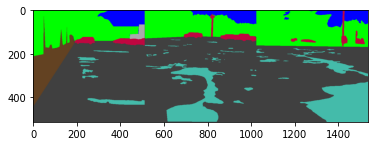

In [17]:
print(gt_mix.shape)
plt.imshow(gt_mix)

In [18]:
from PIL import Image

im = Image.fromarray(gt_mix)
im.save('hsi_water_train_gt.png')